In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statistics import mean
import joblib

In [2]:
plt.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.float_format',lambda x: '%3f' % x)

In [3]:
df = pd.read_csv('shanghaiData.csv')
df.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,72.400000,2005
1,2,University of Cambridge,1,73.600000,99.800000,93.400000,53.300000,56.600000,70.900000,66.900000,2005
2,3,Stanford University,2,73.400000,41.100000,72.200000,88.500000,70.900000,72.300000,65.000000,2005
3,4,"University of California, Berkeley",3,72.800000,71.800000,76.000000,69.400000,73.900000,72.200000,52.700000,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.100000,74.000000,80.600000,66.700000,65.800000,64.300000,53.000000,2005


In [4]:
school_cntry_table = pd.read_csv('school_and_country_table.csv')
school_cntry_table.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [5]:
school_cntry_table.rename(columns={'school_name': 'university_name'},inplace=True)

In [6]:
school_cntry_table.columns

Index(['university_name', 'country'], dtype='object')

In [7]:
df = pd.merge(school_cntry_table,df,how='right',on='university_name')
df.head()

,university_name,country,world_rank,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,Harvard University,United States of America,1,1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,72.400000,2005
1,University of Cambridge,United Kingdom,2,1,73.600000,99.800000,93.400000,53.300000,56.600000,70.900000,66.900000,2005
2,Stanford University,United States of America,3,2,73.400000,41.100000,72.200000,88.500000,70.900000,72.300000,65.000000,2005
3,"University of California, Berkeley",United States of America,4,3,72.800000,71.800000,76.000000,69.400000,73.900000,72.200000,52.700000,2005
4,Massachusetts Institute of Technology (MIT),NaN,5,4,70.100000,74.000000,80.600000,66.700000,65.800000,64.300000,53.000000,2005


In [8]:
df.shape

(4897, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4897 entries, 0 to 4896
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university_name  4896 non-null   object 
 1   country          3014 non-null   object 
 2   world_rank       4897 non-null   object 
 3   national_rank    4896 non-null   object 
 4   total_score      1101 non-null   float64
 5   alumni           4896 non-null   float64
 6   award            4895 non-null   float64
 7   hici             4895 non-null   float64
 8   ns               4875 non-null   float64
 9   pub              4895 non-null   float64
 10  pcp              4895 non-null   float64
 11  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 497.4+ KB


In [10]:
df.describe()

,total_score,alumni,award,hici,ns,pub,pcp,year
count,1101.000000,4896.000000,4895.000000,4895.000000,4875.000000,4895.000000,4895.000000,4897.000000
mean,36.383470,9.161724,7.691910,16.221491,16.078503,38.254648,21.242329,2009.658566
std,13.557186,14.140636,15.494110,14.382710,12.511529,13.050809,9.254351,3.197576
min,23.500000,0.000000,0.000000,0.000000,0.000000,7.300000,8.300000,2005.000000
25%,27.400000,0.000000,0.000000,7.300000,8.000000,28.900000,15.600000,2007.000000
50%,31.300000,0.000000,0.000000,12.600000,12.800000,36.000000,19.000000,2009.000000
75%,41.800000,15.600000,13.400000,21.700000,19.800000,45.300000,24.500000,2012.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2015.000000


In [11]:
df.isnull().sum()

university_name       1
country            1883
world_rank            0
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

In [12]:
df[df.duplicated()]

,university_name,country,world_rank,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year


In [13]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].mean(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

university_name    0
country            0
world_rank         0
national_rank      0
total_score        0
alumni             0
award              0
hici               0
ns                 0
pub                0
pcp                0
year               0
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

Skewness of total_score: 4.072143395217561
Kurtosis of total_score: 29.972188432445495


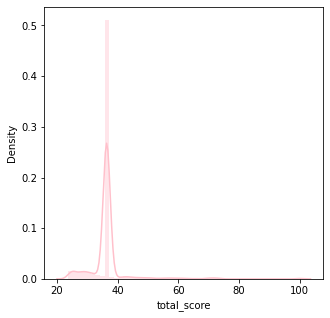

Skewness of alumni: 2.3706962674674523
Kurtosis of alumni: 8.153401416148299


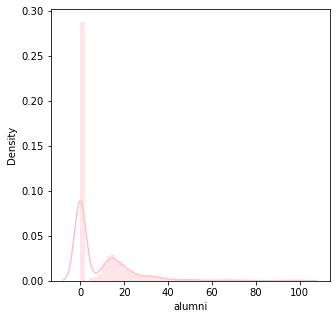

Skewness of award: 2.901589882873188
Kurtosis of award: 10.323737679422303


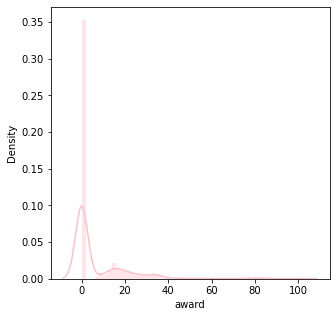

Skewness of hici: 1.7364704800782333
Kurtosis of hici: 4.482825176503704


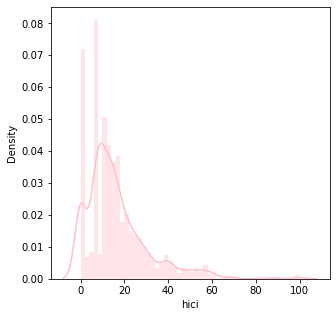

Skewness of ns: 2.200471849757691
Kurtosis of ns: 7.256116520399091


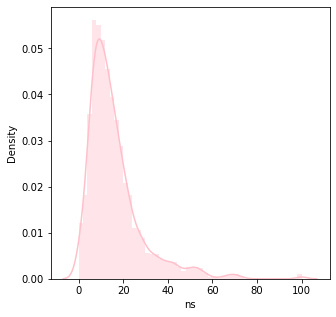

Skewness of pub: 0.8885209711506316
Kurtosis of pub: 1.084311996336623


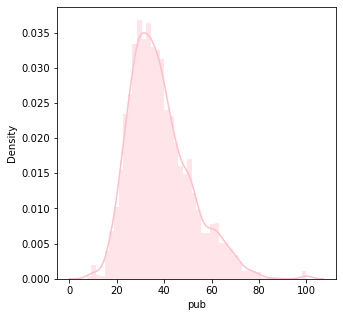

Skewness of pcp: 3.082433099222106
Kurtosis of pcp: 16.473810555736936


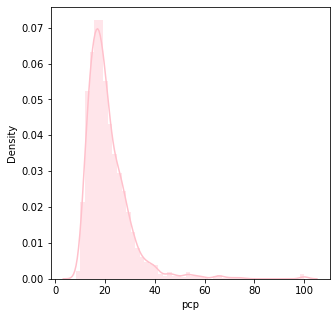

Skewness of year: 0.24137440416880912
Kurtosis of year: -1.1208102448133774


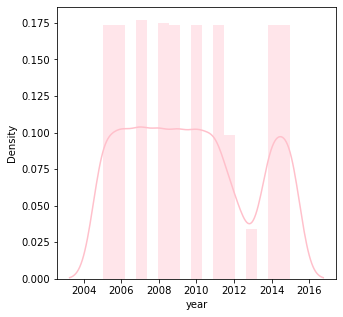

In [15]:
for col in df.columns:
    if df[col].dtypes != 'object':
        print("Skewness of {}:".format(col),df[col].skew())
        print("Kurtosis of {}:".format(col),df[col].kurt())
        plt.figure(figsize=(5,5))
        sns.distplot(df[col],color='pink')
        plt.show()

## Bivariate Analysis

In [16]:
top_10_universities = df.groupby('university_name')['total_score'].mean().sort_values(ascending=False).reset_index()[:10]
top_10_universities

,university_name,total_score
0,Harvard University,100.000000
1,Stanford University,72.900000
2,"University of California, Berkeley",71.600000
3,Massachusetts Institute of Technology (MIT),70.554545
4,University of Cambridge,70.490909
5,University of California-Berkeley,70.100000
6,California Institute of Technology,64.172727
7,Columbia University,60.963636
8,Princeton University,60.527273
9,University of Chicago,57.709091


Text(0.5, 1.0, 'Top 10 Universities based on Total Score')

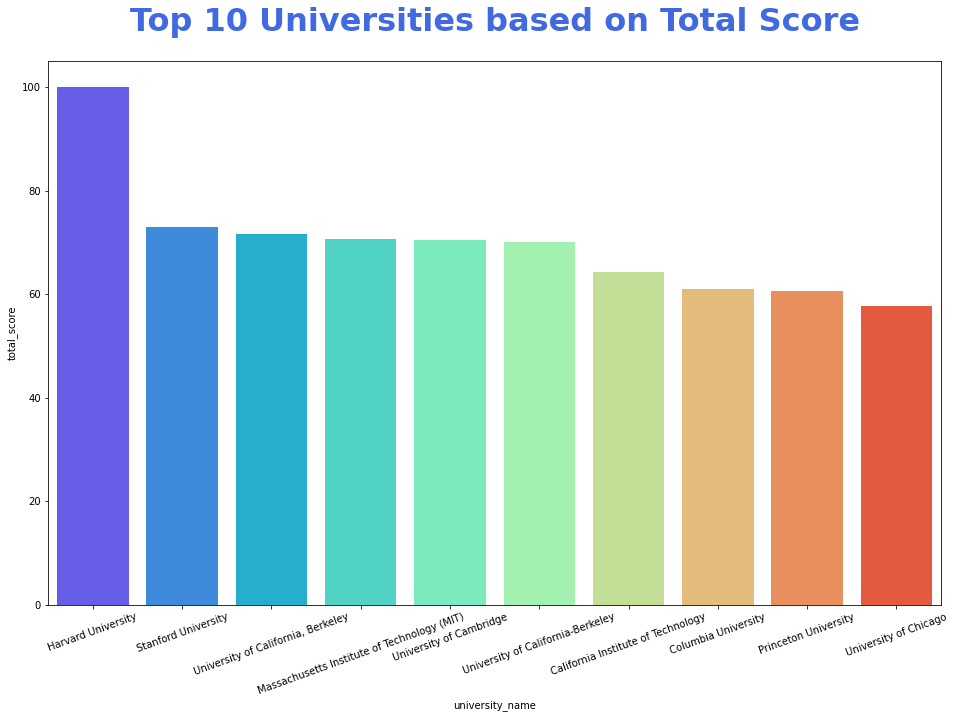

In [17]:
sns.barplot(x='university_name',y='total_score',data=top_10_universities,palette='rainbow')
plt.xticks(rotation=20)
plt.title('Top 10 Universities based on Total Score',fontsize=32,color='royalblue',fontweight='bold',pad=30)

Harvard University is the top-ranked university in the world.

In [18]:
bottom_10_universities = df.groupby('university_name')['total_score'].mean().sort_values().reset_index()[:10]
bottom_10_universities

,university_name,total_score
0,Texas A&M University,23.900000
1,Texas A & M University,24.200000
2,KU Leuven,24.450000
3,Arizona State University,24.700000
4,Texas A&M University - College Station,24.875000
5,McMaster University,24.900000
6,Rice University,25.090909
7,University of Basel,25.427273
8,University of Utah,25.490909
9,Stockholm University,25.827273


Text(0.5, 1.0, 'Bottom 10 Universities based on Total Score')

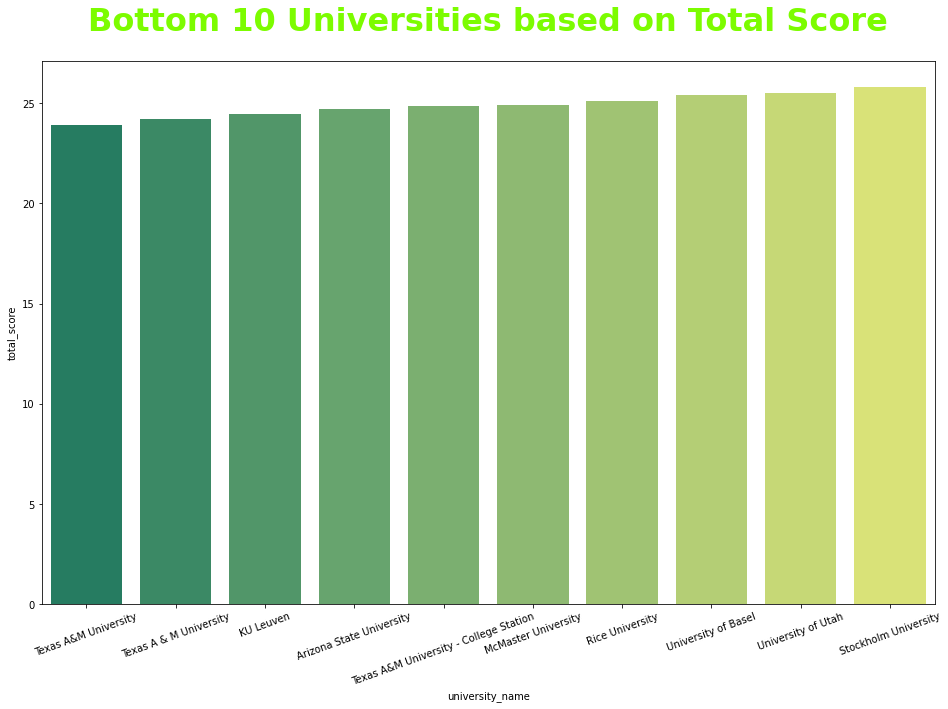

In [19]:
sns.barplot(x='university_name',y='total_score',data=bottom_10_universities,palette='summer')
plt.xticks(rotation=20)
plt.title('Bottom 10 Universities based on Total Score',fontsize=32,color='lawngreen',fontweight='bold',pad=30)

Texas A&M University is the lowest ranked university in the world.

Let's check out the universities possessing the highest alumni score.

In [20]:
top_10_universities = df.groupby('university_name')['alumni'].mean().sort_values(ascending=False).reset_index()[:10]
top_10_universities

,university_name,alumni
0,Harvard University,100.000000
1,University of Cambridge,87.327273
2,Massachusetts Institute of Technology (MIT),70.945455
3,Columbia University,70.527273
4,"University of California, Berkeley",68.760000
5,University of California-Berkeley,66.800000
6,University of Chicago,66.081818
7,Princeton University,57.054545
8,University of Oxford,56.236364
9,California Institute of Technology,52.118182


Text(0.5, 1.0, 'Top 10 Universities based on Alumni Score')

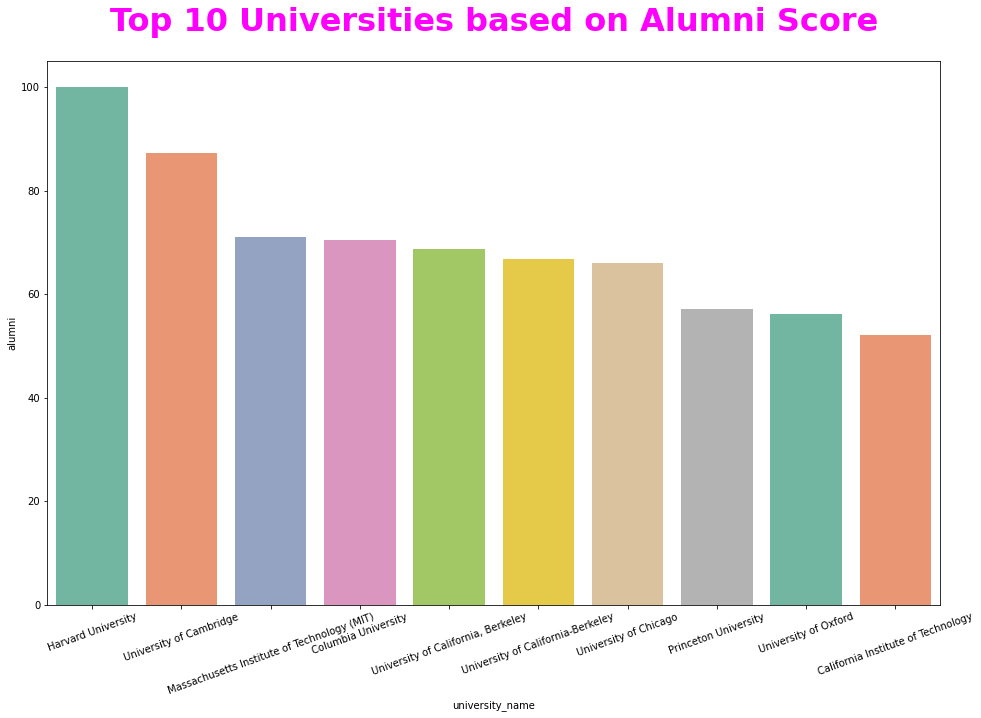

In [21]:
sns.barplot(x='university_name',y='alumni',data=top_10_universities,palette='Set2')
plt.xticks(rotation=20)
plt.title('Top 10 Universities based on Alumni Score',fontsize=32,color='fuchsia',fontweight='bold',pad=30)

The alumni of Harvard University win the majority of Nobel Prizes and field awards and can be considered to be the most successful as compared to their counterparts from miscellaneous universities.

In [22]:
best_countries = df.groupby('country')['total_score'].mean().sort_values(ascending=False).reset_index()[:10]
best_countries

,country,total_score
0,United Kingdom,38.009693
1,United States of America,36.928572
2,Serbia,36.383470
3,New Zealand,36.383470
4,Poland,36.383470
5,Portugal,36.383470
6,Republic of Ireland,36.383470
7,Russian Federation,36.383470
8,Saudi Arabia,36.383470
9,Singapore,36.383470


Text(0.5, 1.0, 'Top 10 Countries based on Total Score')

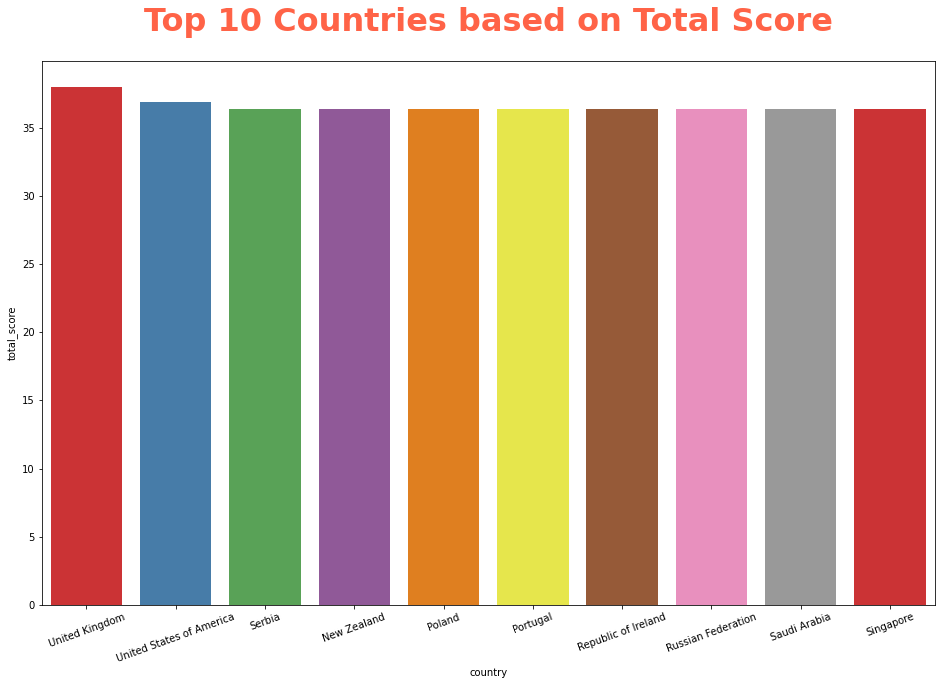

In [23]:
sns.barplot(x='country',y='total_score',data=best_countries,palette='Set1')
plt.xticks(rotation=20)
plt.title('Top 10 Countries based on Total Score',fontsize=32,color='tomato',fontweight='bold',pad=30)

Most of the world's highly prestigious and esteemed universities are located in United Kingdom such as University of Cambridge, University of Oxford, etc. UK can be a great education destination for international students as a consequence of its state-of-the-art education services.

In [24]:
worst_countries = df.groupby('country')['total_score'].mean().sort_values().reset_index()[:10]
worst_countries

,country,total_score
0,Sweden,32.283631
1,Switzerland,32.499785
2,Belgium,32.684871
3,Norway,33.386291
4,Denmark,33.495425
5,Finland,34.125894
6,Netherlands,34.259747
7,France,34.550115
8,Australia,34.773149
9,Germany,35.093818


Text(0.5, 1.0, 'Worst 10 Countries based on Total Score')

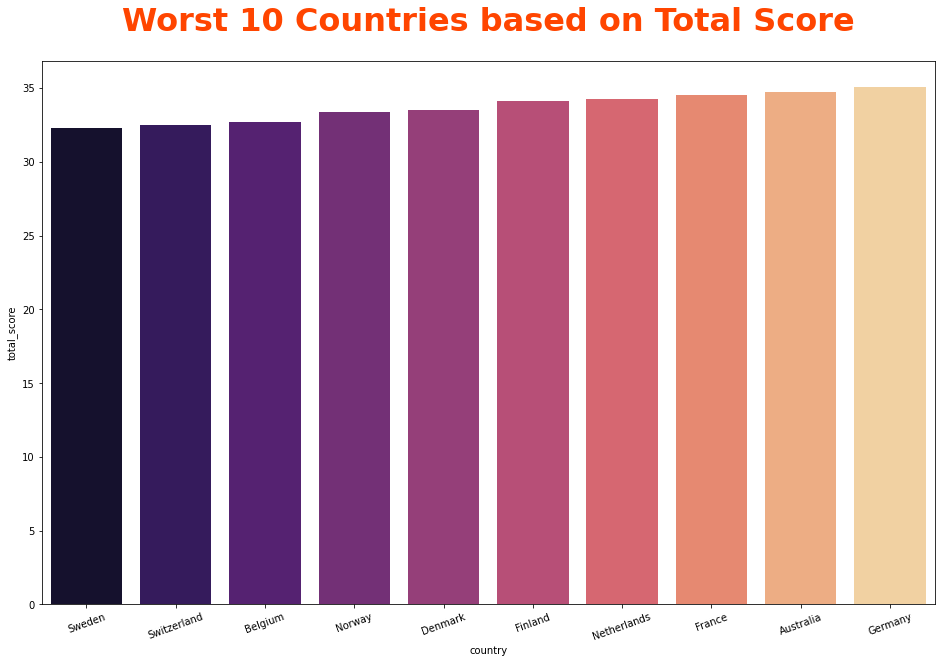

In [25]:
sns.barplot(x='country',y='total_score',data=worst_countries,palette='magma')
plt.xticks(rotation=20)
plt.title('Worst 10 Countries based on Total Score',fontsize=32,color='orangered',fontweight='bold',pad=30)

Sweden is the least popular nation for university education.

Let's check out the maximum award winning institutions.

In [26]:
top_10_universities = df.groupby(['university_name','country'])['award'].mean().sort_values(ascending=False).reset_index()[:10]
top_10_universities

,university_name,country,award
0,Harvard University,United States of America,100.000000
1,University of Cambridge,United Kingdom,94.218182
2,Princeton University,United States of America,84.763636
3,University of Chicago,United States of America,83.418182
4,Massachusetts Institute of Technology (MIT),United States of America,81.009091
5,University of California-Berkeley,United States of America,79.400000
6,Stanford University,United States of America,78.963636
7,"University of California, Berkeley",United States of America,77.970000
8,California Institute of Technology,United States of America,68.363636
9,Columbia University,United States of America,65.463636


Text(0.5, 1.0, 'Top 10 Award Winning Institutions')

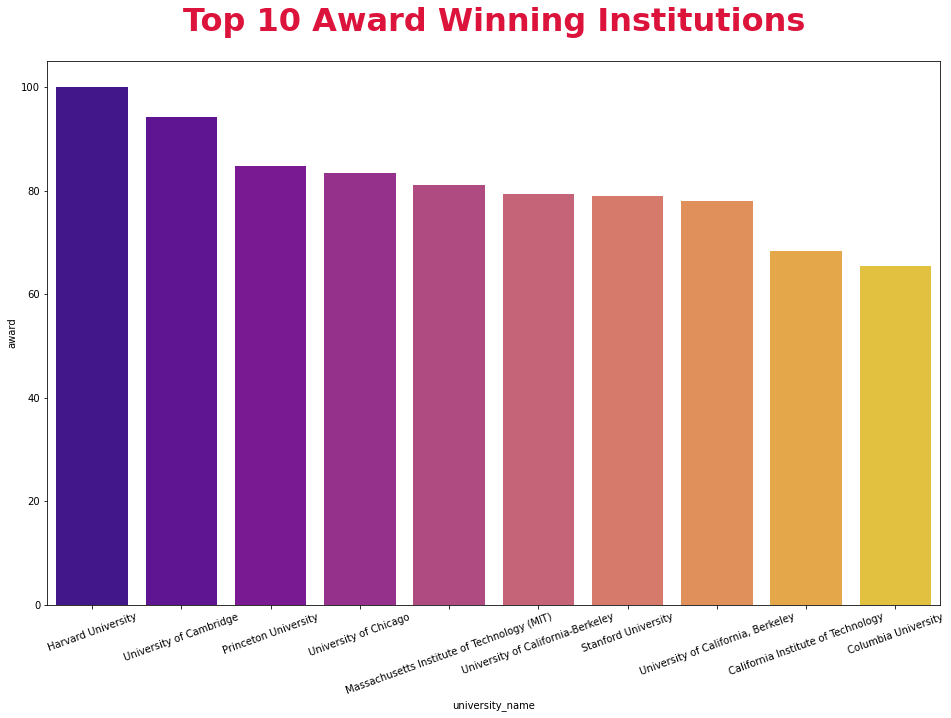

In [27]:
sns.barplot(x='university_name',y='award',data=top_10_universities,palette='plasma')
plt.xticks(rotation=20)
plt.title('Top 10 Award Winning Institutions',fontsize=32,color='crimson',fontweight='bold',pad=30)

Harvard University has the most successful, esteemed and well-qualified staff who have won the maximum number of Nobel Prices in various fields like Physics, Chemistry, Medicine, etc. 

In [28]:
top_10_universities = df.groupby(['country','university_name'])['pub'].mean().sort_values(ascending=False).reset_index()[:10]
top_10_universities

,country,university_name,pub
0,United States of America,Harvard University,100.000000
1,Canada,University of Toronto,78.790909
2,United States of America,The University of Tokyo,78.345455
3,United States of America,University of Michigan - Ann Arbor,77.255556
4,United States of America,University of Michigan-Ann Arbor,76.600000
5,United States of America,"University of California, Los Angeles",73.918182
6,United States of America,University of Washington,72.881818
7,United States of America,Stanford University,70.563636
8,United States of America,Johns Hopkins University,70.200000
9,United States of America,University of Sao Paulo,69.900000


Text(0.5, 1.0, 'Universities with highest number of journals and research publications')

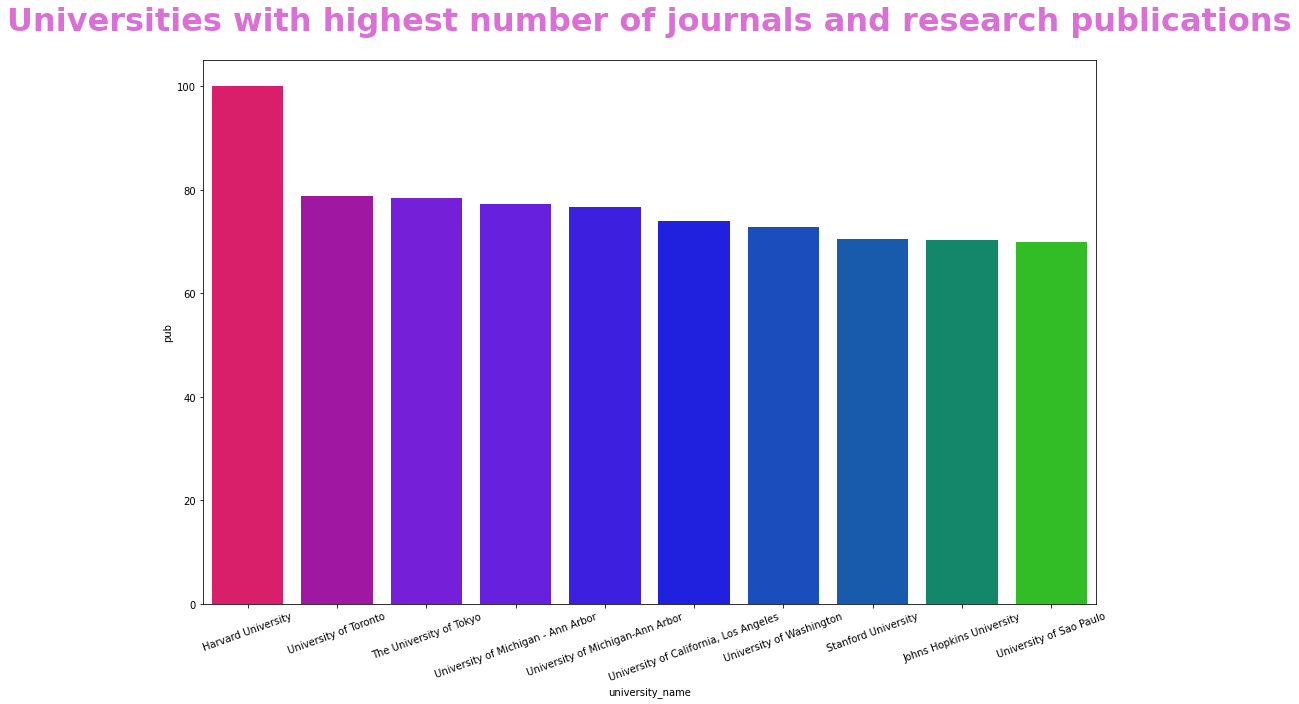

In [29]:
sns.barplot(x='university_name',y='pub',data=top_10_universities,palette='prism')
plt.xticks(rotation=20)
plt.title('Universities with highest number of journals and research publications',fontsize=32,color='orchid',fontweight='bold',pad=30)

Harvard University has a lion's share of the total number of papers indexed in the Science Citation Index-Expanded and Social Science Citation. 

In [30]:
bottom_10_universities = df.groupby(['country','university_name'])['pub'].mean().sort_values().reset_index()[:10]
bottom_10_universities

,country,university_name,pub
0,United States of America,MINES ParisTech,7.950000
1,United States of America,Ecole National Superieure Mines - Paris,9.657143
2,United States of America,Toulouse School of Economics,10.000000
3,United States of America,Stockholm School of Economics,10.433333
4,United States of America,University of Paris Dauphine (Paris 9),11.812500
5,United States of America,Paris Dauphine University (Paris 9),12.700000
6,India,University of Calcutta,14.700000
7,United States of America,Northern Arizona University,15.100000
8,United States of America,ESPCI ParisTech,15.250000
9,Switzerland,University of Fribourg,15.840000


Text(0.5, 1.0, 'Universities with lowest number of journals and research publications')

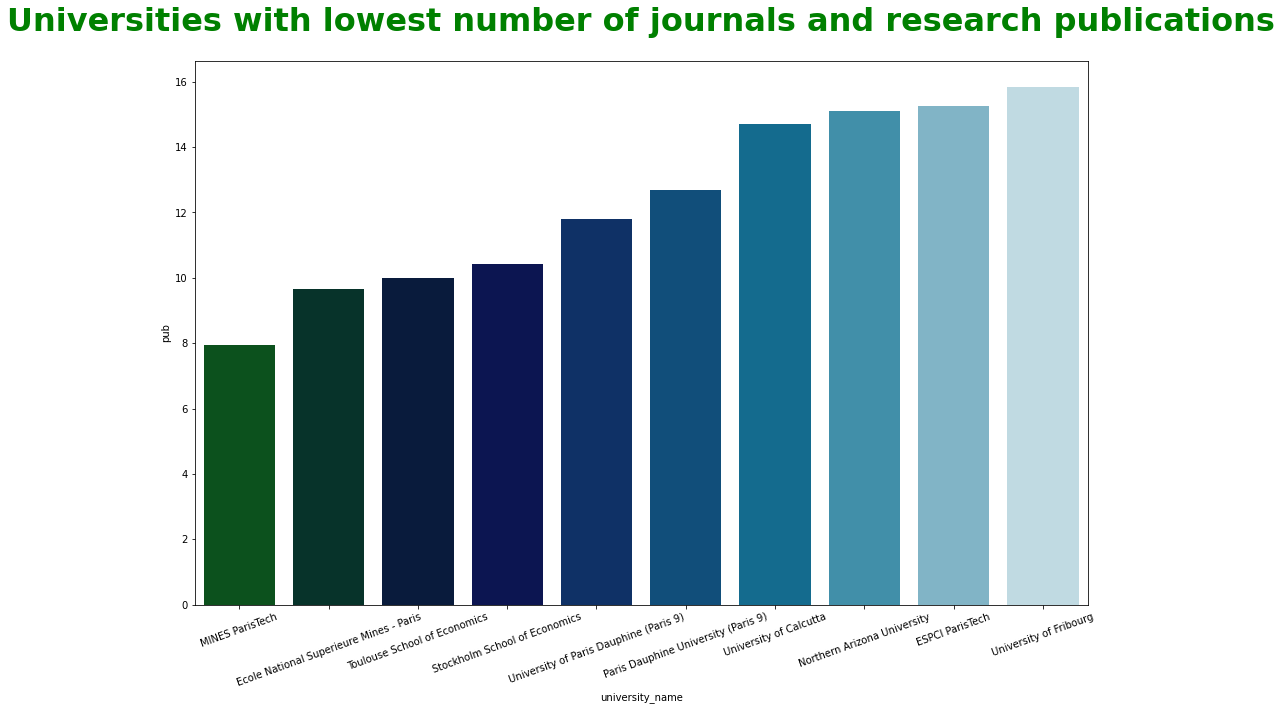

In [31]:
sns.barplot(x='university_name',y='pub',data=bottom_10_universities,palette='ocean')
plt.xticks(rotation=20)
plt.title('Universities with lowest number of journals and research publications',fontsize=32,color='green',fontweight='bold',pad=30)

MINES ParisTech in USA has the lowest share in the total number of papers indexed in the Science Citation Index-Expanded and Social Science Citation among all the universities.

In [32]:
top_10_universities = df.groupby(['country','university_name'])['ns'].mean().sort_values(ascending=False).reset_index()[:10]
top_10_universities

,country,university_name,ns
0,United States of America,Harvard University,100.000000
1,United States of America,"University of California, Berkeley",70.370000
2,United States of America,Stanford University,69.709091
3,United States of America,Massachusetts Institute of Technology (MIT),69.409091
4,United States of America,University of California-Berkeley,67.500000
5,United States of America,California Institute of Technology,63.927273
6,United States of America,Yale University,57.736364
7,United Kingdom,University of Cambridge,55.763636
8,United States of America,"University of California, San Diego",54.527273
9,United States of America,"University of California, San Francisco",53.800000


Text(0.5, 1.0, 'Universities with highest number of papers published in nature and science')

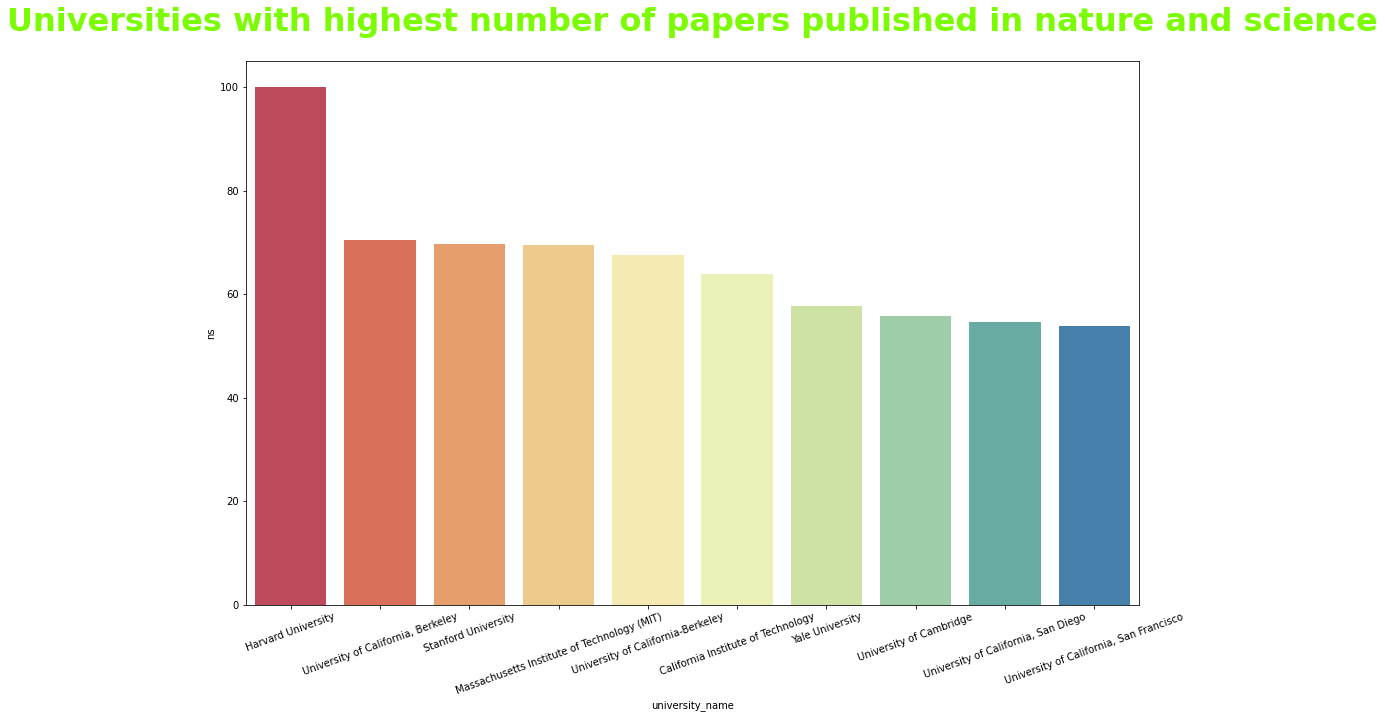

In [33]:
sns.barplot(x='university_name',y='ns',data=top_10_universities,palette='Spectral')
plt.xticks(rotation=20)
plt.title('Universities with highest number of papers published in nature and science',fontsize=32,color='lawngreen',fontweight='bold',pad=30)

Harvard University has a substantial number of papers published in nature and science.

In [34]:
top_10_universities = df.groupby(['country','university_name'])['pcp'].mean().sort_values(ascending=False).reset_index()[:10]
top_10_universities

,country,university_name,pcp
0,United States of America,California Institute of Technology,100.000000
1,United States of America,Harvard University,73.009091
2,United States of America,Princeton University,63.454545
3,United States of America,Massachusetts Institute of Technology (MIT),60.063636
4,United Kingdom,University of Cambridge,59.136364
5,United States of America,Stanford University,57.618182
6,United States of America,University of California-Berkeley,55.900000
7,United States of America,"University of California, Berkeley",53.650000
8,United States of America,Swiss Federal Institute of Technology Zurich,49.436364
9,United States of America,Ecole Normale Superieure - Paris,48.545455


Text(0.5, 1.0, 'Universities with the highest PCP Score')

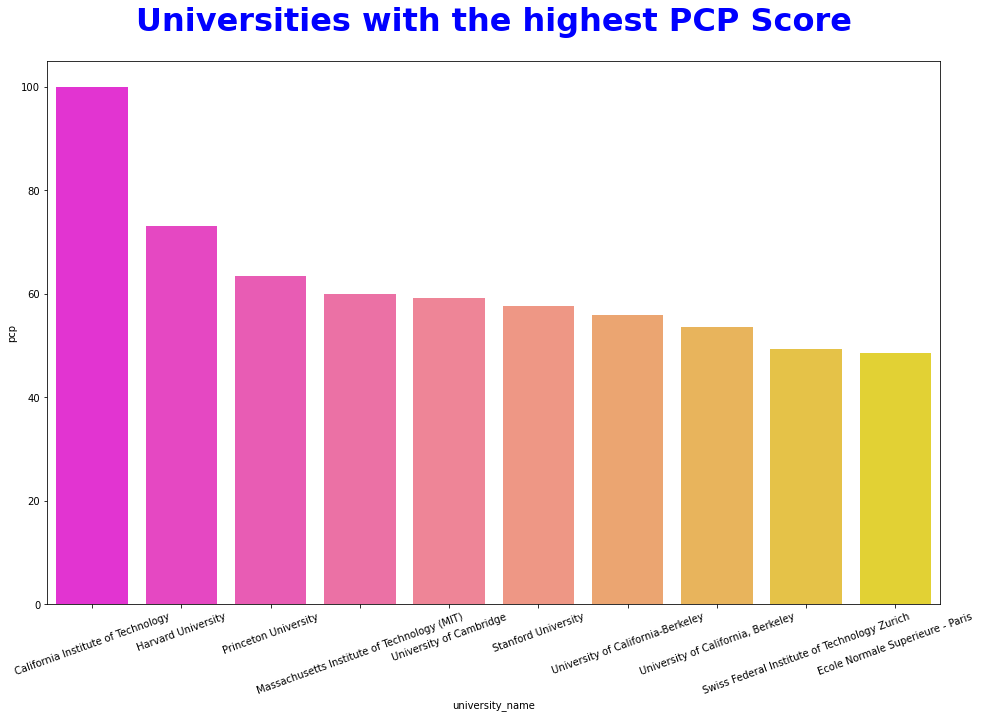

In [35]:
sns.barplot(x='university_name',y='pcp',data=top_10_universities,palette='spring')
plt.xticks(rotation=20)
plt.title('Universities with the highest PCP Score',fontsize=32,color='blue',fontweight='bold',pad=30)

California Institute of Technology has the highest PCP score among all universities in the world.

In [36]:
bottom_10_universities = df.groupby(['country','university_name'])['pcp'].mean().sort_values().reset_index()[:10]
bottom_10_universities

,country,university_name,pcp
0,United States of America,Howard University,9.200000
1,India,University of Calcutta,9.500000
2,United States of America,University of Lille 1,9.666667
3,United States of America,The University of Memphis,10.300000
4,Canada,Memorial University of Newfoundland,10.300000
5,United States of America,The Graduate University for Advanced Studies,10.500000
6,United States of America,Nara Institute of Science and Technology,10.600000
7,Japan,Juntendo University,10.600000
8,United States of America,Brigham Young University,10.966667
9,United States of America,Northern Arizona University,11.000000


Text(0.5, 1.0, 'Universities with the lowest PCP Score')

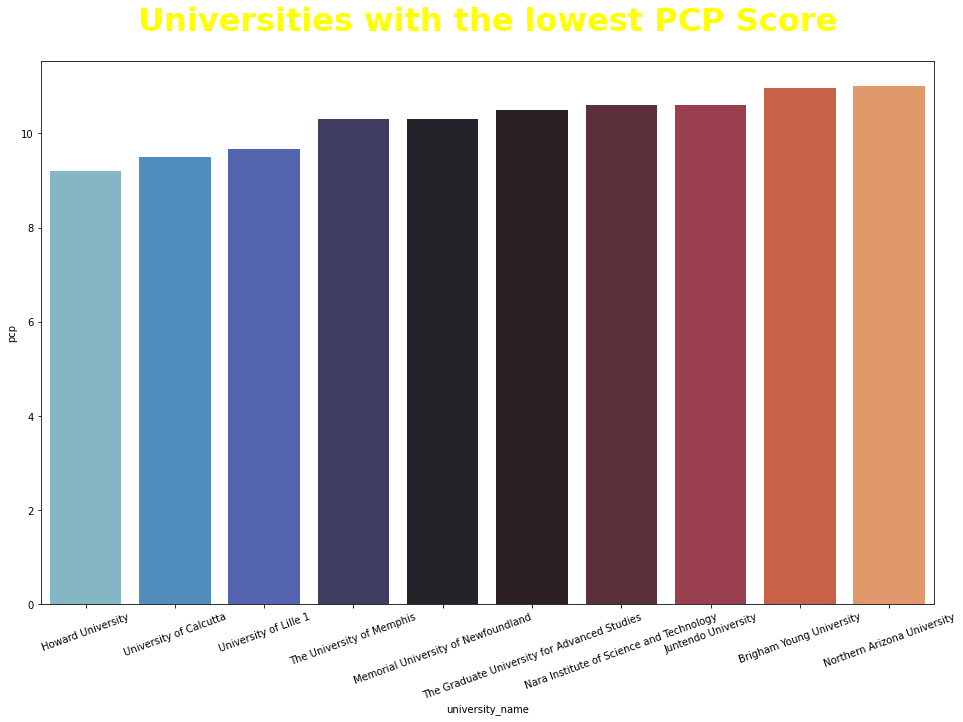

In [37]:
sns.barplot(x='university_name',y='pcp',data=bottom_10_universities,palette='icefire')
plt.xticks(rotation=20)
plt.title('Universities with the lowest PCP Score',fontsize=32,color='yellow',fontweight='bold',pad=30)

Howard University in USA has the lowest PCP score among all universities.

## Multivariate Analysis

<AxesSubplot:>

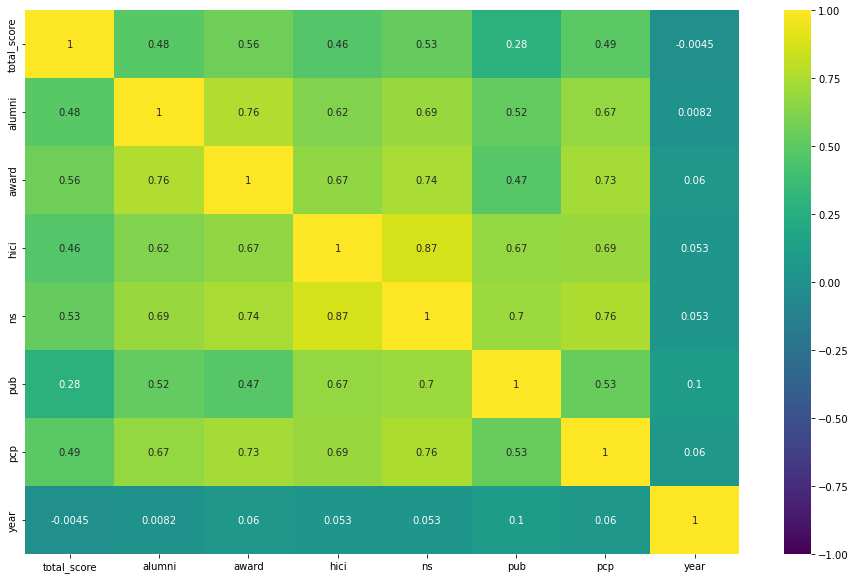

In [38]:
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

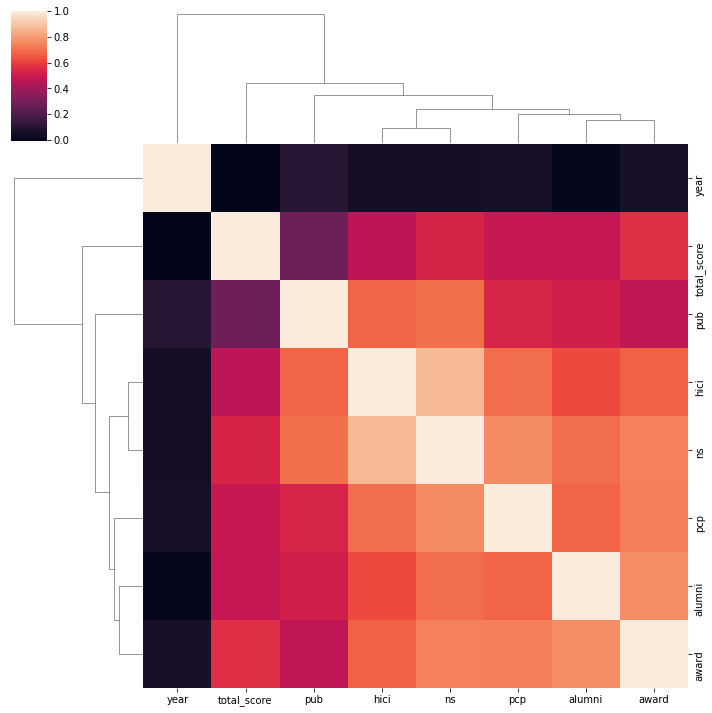

In [39]:
sns.clustermap(df.corr())

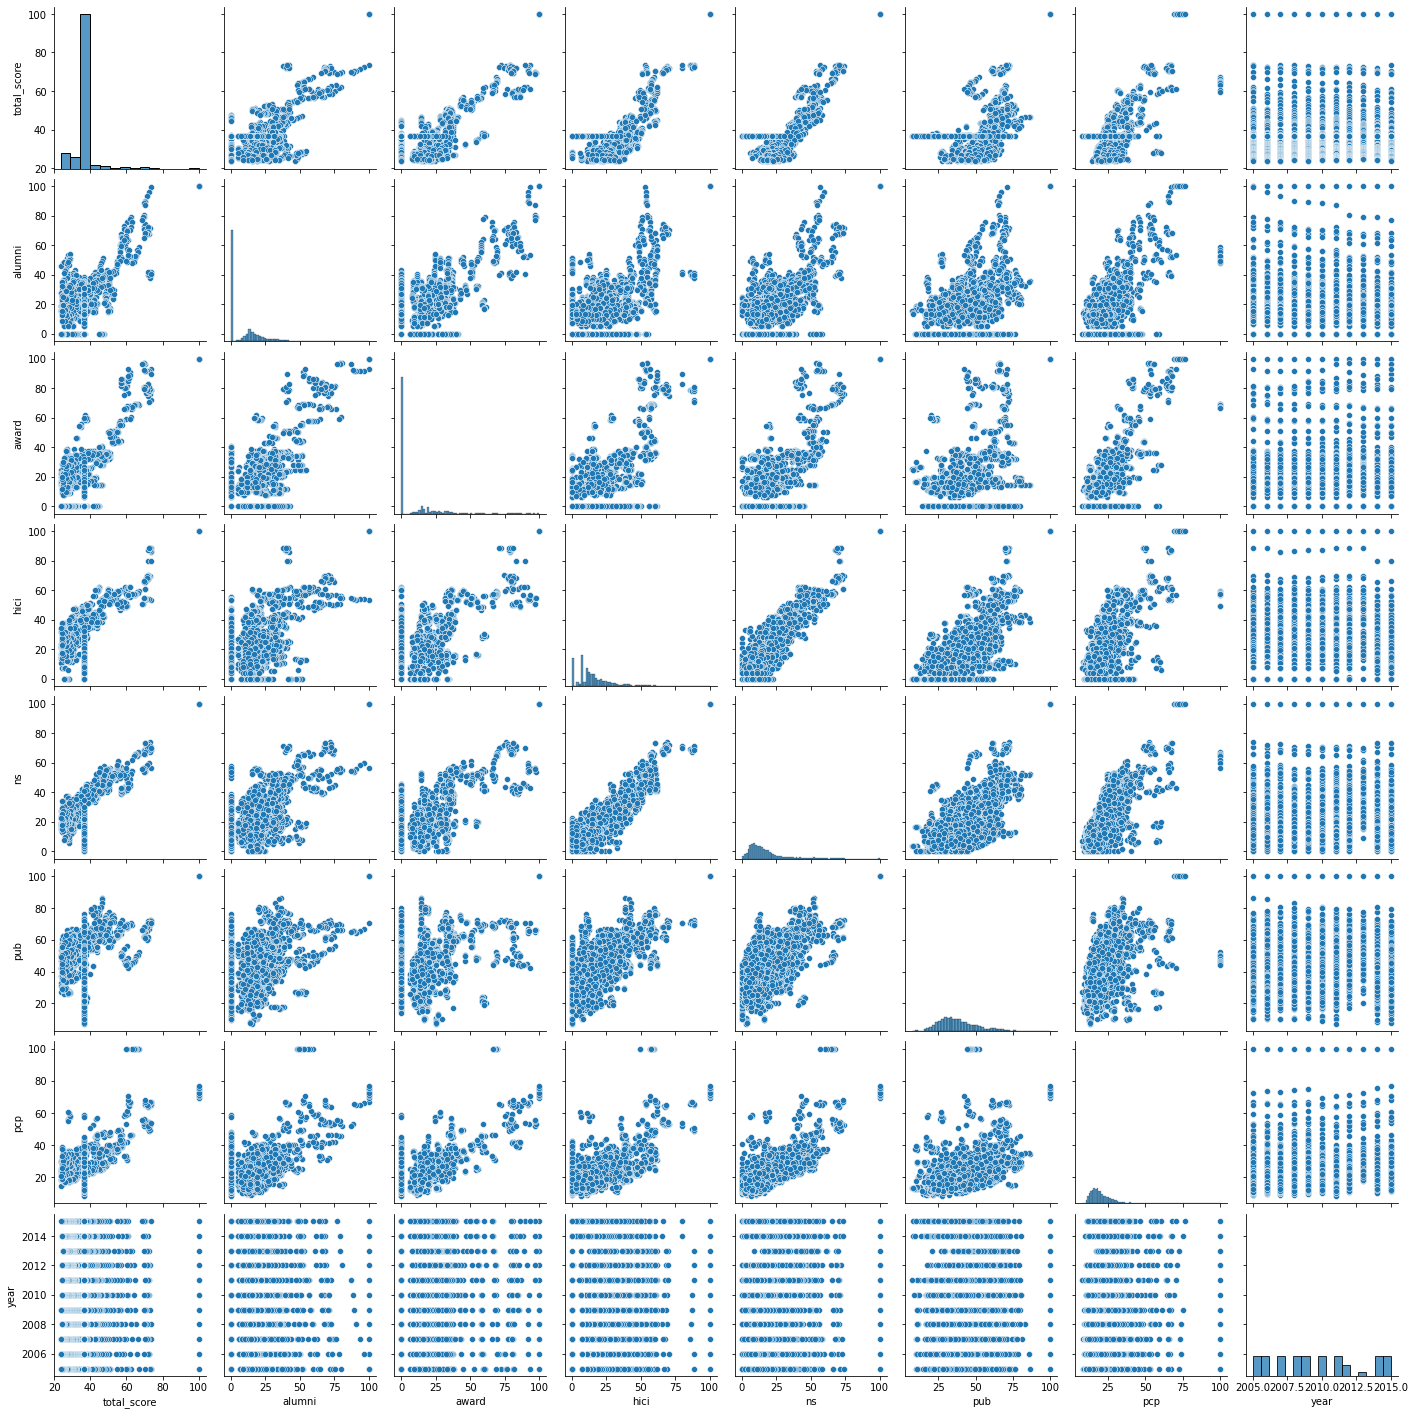

In [40]:
sns.pairplot(df)

There is a strong positive correlation between HiCi score and NS score. More the number of highly cited researchers in a university, more would be its number of papers in nature and science.

## Outlier Detection(Part of Univariate Analysis)

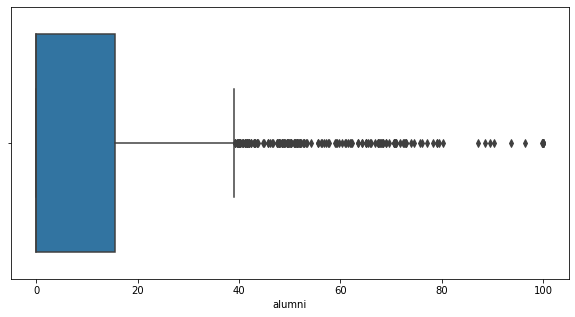

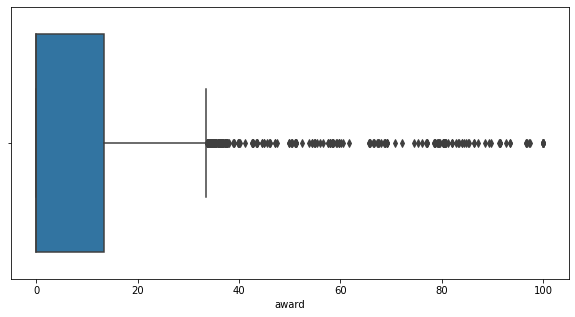

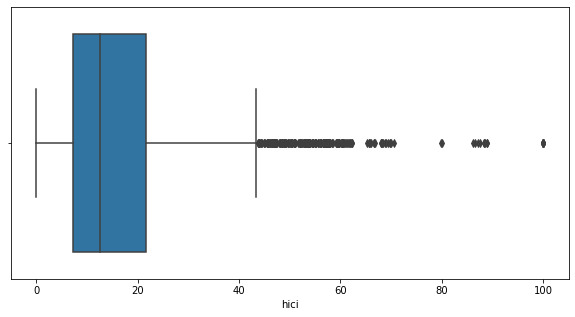

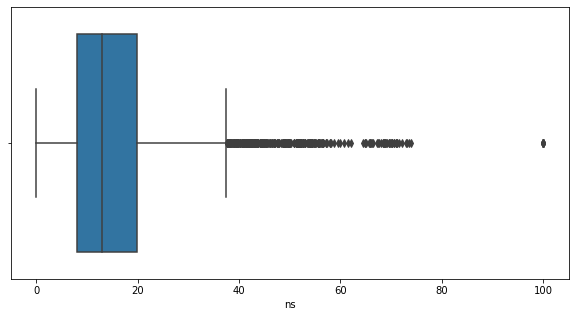

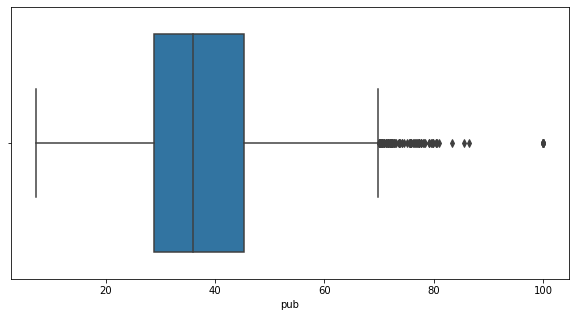

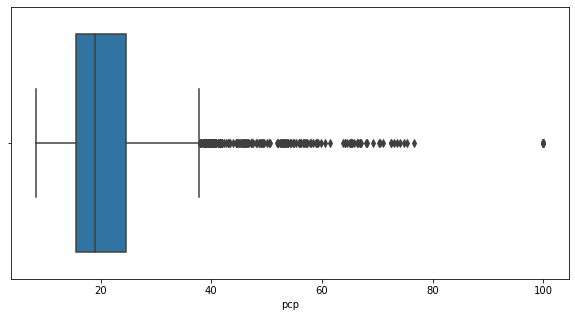

In [41]:
for col in df.columns:
    if col not in ['total_score','year']:
        if df[col].dtypes != 'object':
            plt.figure(figsize=(10,5))
            sns.boxplot(df[col])
            plt.show()

## Outlier Treatment

In [42]:
#Performing IQR based filtering
for col in df.columns:
    if col not in ['total_score','year']:
        if df[col].dtypes != 'object':
            lower_limit, upper_limit = df[col].quantile([0.25,0.75])
            IQR = upper_limit - lower_limit
            lower_whisker = lower_limit - 1.5 * IQR
            upper_whisker = upper_limit + 1.5 * IQR
            df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))

## Feature Engineering

In [43]:
le = LabelEncoder()
df.university_name = le.fit_transform(df.university_name)

In [44]:
le.classes_, le.transform(le.classes_)

(array(['Aalborg University', 'Aalto University', 'Aarhus University',
        'Aix Marseille University', 'Aix-Marseille University',
        'Aristotle University of Thessaloniki', 'Arizona State University',
        'Arizona State University - Tempe', 'Auburn University',
        'Autonomous University of Barcelona',
        'Autonomous University of Madrid', 'Bangor University',
        'Bar-Ilan University', 'Baylor College of Medicine',
        'Beihang University', 'Beijing Normal University',
        'Beijing University of Aeronautics and Astronautics',
        'Ben-Gurion University of the Negev', 'Bielefeld University',
        'Birkbeck, University of London', 'Boston College',
        'Boston University', 'Brandeis University',
        'Brigham Young University', 'Brown University',
        'Brunel University', 'Cairo University',
        'California Institute of Technology', 'Capital Medical University',
        'Capital University of Medical Sciences', 'Cardiff University

In [45]:
le = LabelEncoder()
df.country = le.fit_transform(df.country)

In [46]:
le.classes_, le.transform(le.classes_)

(array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
        'China', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
        'Germany', 'Greece', 'Hong Kong', 'Hungary', 'India', 'Iran',
        'Israel', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand',
        'Norway', 'Poland', 'Portugal', 'Republic of Ireland',
        'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore',
        'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
        'Switzerland', 'Taiwan', 'Turkey', 'United Kingdom',
        'United States of America'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]))

In [47]:
world_ranks = df.world_rank.str.split('-').values
for i in range(len(world_ranks)):
    world_ranks[i] = mean([int(n) for n in world_ranks[i]])
df.world_rank = world_ranks
df.world_rank = df.world_rank.astype(int)

In [48]:
national_ranks = df.national_rank.str.split('-').values
for i in range(len(national_ranks)):
    national_ranks[i] = round(mean([float(n) for n in national_ranks[i]]))
df.national_rank = national_ranks
df.national_rank = df.national_rank.astype(float)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4897 entries, 0 to 4896
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university_name  4897 non-null   int32  
 1   country          4897 non-null   int32  
 2   world_rank       4897 non-null   int32  
 3   national_rank    4897 non-null   float64
 4   total_score      4897 non-null   float64
 5   alumni           4897 non-null   float64
 6   award            4897 non-null   float64
 7   hici             4897 non-null   float64
 8   ns               4897 non-null   float64
 9   pub              4897 non-null   float64
 10  pcp              4897 non-null   float64
 11  year             4897 non-null   int64  
dtypes: float64(8), int32(3), int64(1)
memory usage: 569.0 KB


In [50]:
# scaler = StandardScaler()
# features = df.columns
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df,columns=features)
# df.head()

In [51]:
# df.columns, scaler.scale_

## Dividing the dataset into training and testing sets

In [52]:
X = df.drop('world_rank',axis=1)
y = df.world_rank

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=1)

In [54]:
scaler = StandardScaler()
features = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)
X_train.head()

,university_name,country,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,0.686747,0.655059,-0.036777,-0.005205,-0.733991,-0.579695,-1.284173,-0.320518,-0.205603,-0.509263,-0.209942
1,-1.276048,0.655059,-0.752969,9.956101,2.669973,2.502029,2.355902,2.359800,2.551853,2.568215,0.732577
2,-1.409029,-0.901670,-0.135562,-0.005205,-0.733991,-0.579695,-0.670488,-0.856582,-1.209763,-0.909706,-0.209942
3,0.122909,0.655059,-0.678880,-0.005205,-0.733991,-0.579695,-1.284173,-0.751471,0.479776,0.024661,1.360924
4,-1.233495,-1.198190,-0.752969,-0.005205,-0.733991,-0.579695,-0.367849,-0.698916,-0.380933,-0.627912,-1.152462


In [83]:
X_train.columns, scaler.scale_

(Index(['university_name', 'country', 'national_rank', 'total_score', 'alumni',
        'award', 'hici', 'ns', 'pub', 'pcp', 'year'],
       dtype='object'),
 array([187.99717655,  13.48981823,  40.49191468,   6.38636438,
         11.45722971,  10.87053734,  11.89535901,   9.51379575,
         12.54779566,   6.742535  ,   3.18295703]))

In [55]:
features = X_test.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features)
X_test.head()

,university_name,country,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1.229308,0.655059,-0.283740,-0.005205,-0.733991,-0.579695,-0.662081,-0.709427,-1.185855,-1.339811,-0.838289
1,0.064397,-0.901670,-0.629488,-0.005205,0.531585,-0.579695,0.548475,0.919786,0.631197,1.463289,-0.209942
2,1.543143,-0.753410,-0.678880,-0.005205,-0.733991,-0.579695,0.817487,0.057880,1.053582,1.107340,0.418404
3,1.351651,-0.901670,-0.580095,-0.005205,-0.733991,1.260140,-0.166090,-0.446651,0.320386,0.069155,-1.152462
4,1.676124,0.136150,-0.728273,-0.005205,-0.733991,-0.579695,-0.670488,-0.572783,0.878253,-0.494431,-0.209942


## Model Training & Evaluation

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
lr.score(X_test,y_test)

0.8637449575696099

In [58]:
lr_pred = lr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,lr_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,lr_pred)))
print("R2 Score:",r2_score(y_test,lr_pred))

MAE: 45.0074369431937
RMSE: 53.58549932700116
R2 Score: 0.8637449575696099


Text(0.5, 1.0, 'R2 Score Distribution for different neighbor values')

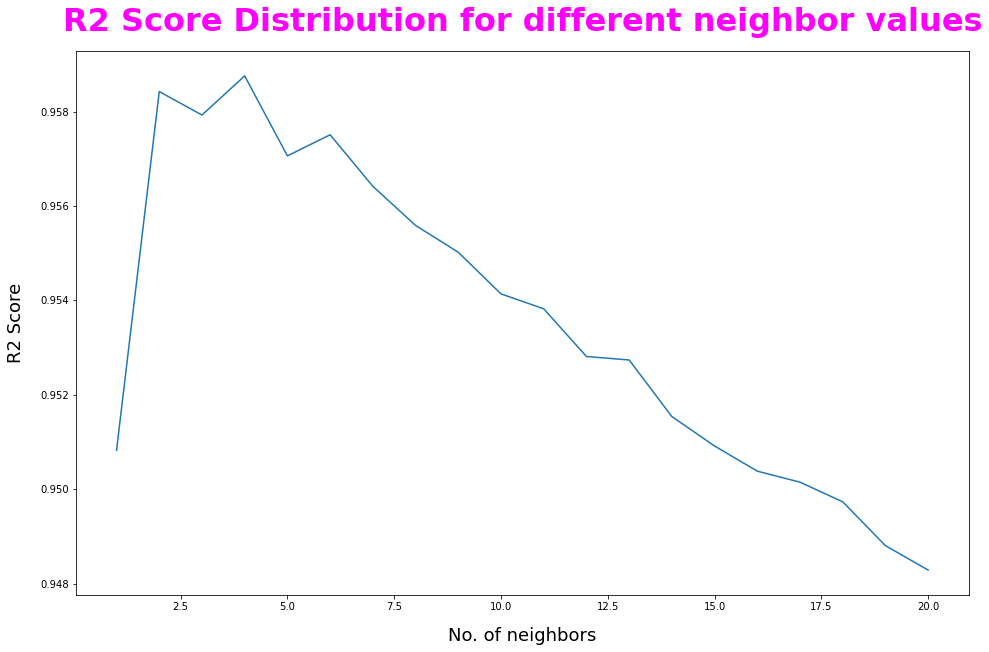

In [59]:
labels = list(np.arange(1,21))
values = []
for x in labels:
    knr = KNeighborsRegressor(n_neighbors=x)
    knr.fit(X_train,y_train)
    values.append(knr.score(X_test,y_test))
ax = sns.lineplot(labels,values)
plt.xlabel('No. of neighbors',fontsize=18,labelpad=15)
plt.ylabel('R2 Score',fontsize=18,labelpad=15)
plt.title('R2 Score Distribution for different neighbor values',fontsize=32,color='magenta',fontweight='bold',pad=20)

In [60]:
knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [61]:
knr.score(X_test,y_test)

0.9587587183464171

In [62]:
knr_pred = knr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,knr_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,knr_pred)))
print("R2 Score:",r2_score(y_test,knr_pred))

MAE: 16.792444574095683
RMSE: 29.480650829607253
R2 Score: 0.9587587183464171


In [63]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [64]:
svr.score(X_test,y_test)

0.84591811139572

In [65]:
svr_pred = svr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,svr_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,svr_pred)))
print("R2 Score:",r2_score(y_test,svr_pred))

MAE: 41.70863066047624
RMSE: 56.98319378069966
R2 Score: 0.84591811139572


In [66]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
dtree.score(X_test,y_test)

0.945814473641259

In [68]:
dtree_pred = dtree.predict(X_test)
print("MAE:",mean_absolute_error(y_test,dtree_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,dtree_pred)))
print("R2 Score:",r2_score(y_test,dtree_pred))

MAE: 12.243873978996499
RMSE: 33.79190211833001
R2 Score: 0.945814473641259


In [69]:
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
rfc.score(X_test,y_test)

0.9764542952666853

In [71]:
rfc_pred = rfc.predict(X_test)
print("MAE:",mean_absolute_error(y_test,rfc_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,rfc_pred)))
print("R2 Score:",r2_score(y_test,rfc_pred))

MAE: 12.883675612602103
RMSE: 22.27546799611045
R2 Score: 0.9764542952666853


In [72]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [73]:
xgb.score(X_test,y_test)

0.974930891738051

In [74]:
xgb_pred = xgb.predict(X_test)
print("MAE:",mean_absolute_error(y_test,xgb_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,xgb_pred)))
print("R2 Score:",r2_score(y_test,xgb_pred))

MAE: 14.500095037658685
RMSE: 22.984784340067325
R2 Score: 0.974930891738051


In [75]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [76]:
gbr.score(X_test,y_test)

0.9694047889644455

In [77]:
gbr_pred = gbr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,gbr_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,gbr_pred)))
print("R2 Score:",r2_score(y_test,gbr_pred))

MAE: 18.886914712908673
RMSE: 25.392047211105186
R2 Score: 0.9694047889644455


In [78]:
print("Performance of various ML models used:")
print("R2 Score for Linear Regression:",str(np.round(r2_score(y_test,lr_pred)*100,2)) + '%')
print("R2 Score for K Neighbors Regressor:",str(np.round(r2_score(y_test,knr_pred)*100,2)) + '%')
print("R2 Score for Support Vector Regressor:",str(np.round(r2_score(y_test,svr_pred)*100,2)) + '%')
print("R2 Score for Decision Tree Regressor:",str(np.round(r2_score(y_test,dtree_pred)*100,2)) + '%')
print("R2 Score for Random Forest Regressor:",str(np.round(r2_score(y_test,rfc_pred)*100,2)) + '%')
print("R2 Score for XG Boost Regressor:",str(np.round(r2_score(y_test,xgb_pred)*100,2)) + '%')
print("R2 Score for Gradient Boosting Regressor:",str(np.round(r2_score(y_test,gbr_pred)*100,2)) + '%')

Performance of various ML models used:
R2 Score for Linear Regression: 86.37%
R2 Score for K Neighbors Regressor: 95.88%
R2 Score for Support Vector Regressor: 84.59%
R2 Score for Decision Tree Regressor: 94.58%
R2 Score for Random Forest Regressor: 97.65%
R2 Score for XG Boost Regressor: 97.49%
R2 Score for Gradient Boosting Regressor: 96.94%


The best performing model is Random Forest Regressor with a prediction accuracy of almost 98%.

## Saving the model for future use

In [79]:
joblib.dump(rfc,'model.pkl')

['model.pkl']

In [80]:
model = joblib.load('model.pkl')
model

RandomForestRegressor()

In [81]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [82]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()